In [2]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

In [3]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

print(len(features))

42


In [6]:
data = pd.read_csv('dataset/kddcup.data_10_percent', names=features, header=None)
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [4]:
print('The no of data points are:',data.shape[0])
print('The no of features are:',data.shape[1])
print('Some of the features are:',features[:10])

The no of data points are: 494021
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [5]:
output = data['intrusion_type'].values
labels = set(output)

In [6]:
print('The different type of output labels are:',labels)

The different type of output labels are: {'teardrop.', 'nmap.', 'pod.', 'smurf.', 'guess_passwd.', 'phf.', 'ftp_write.', 'normal.', 'rootkit.', 'land.', 'portsweep.', 'perl.', 'spy.', 'satan.', 'loadmodule.', 'back.', 'multihop.', 'neptune.', 'warezmaster.', 'imap.', 'ipsweep.', 'warezclient.', 'buffer_overflow.'}


# Data Cleaning

In [7]:
print('Null values in the dataset are: ',len(data[data.isnull().any(1)]))
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

Null values in the dataset are:  0


(145586, 42)

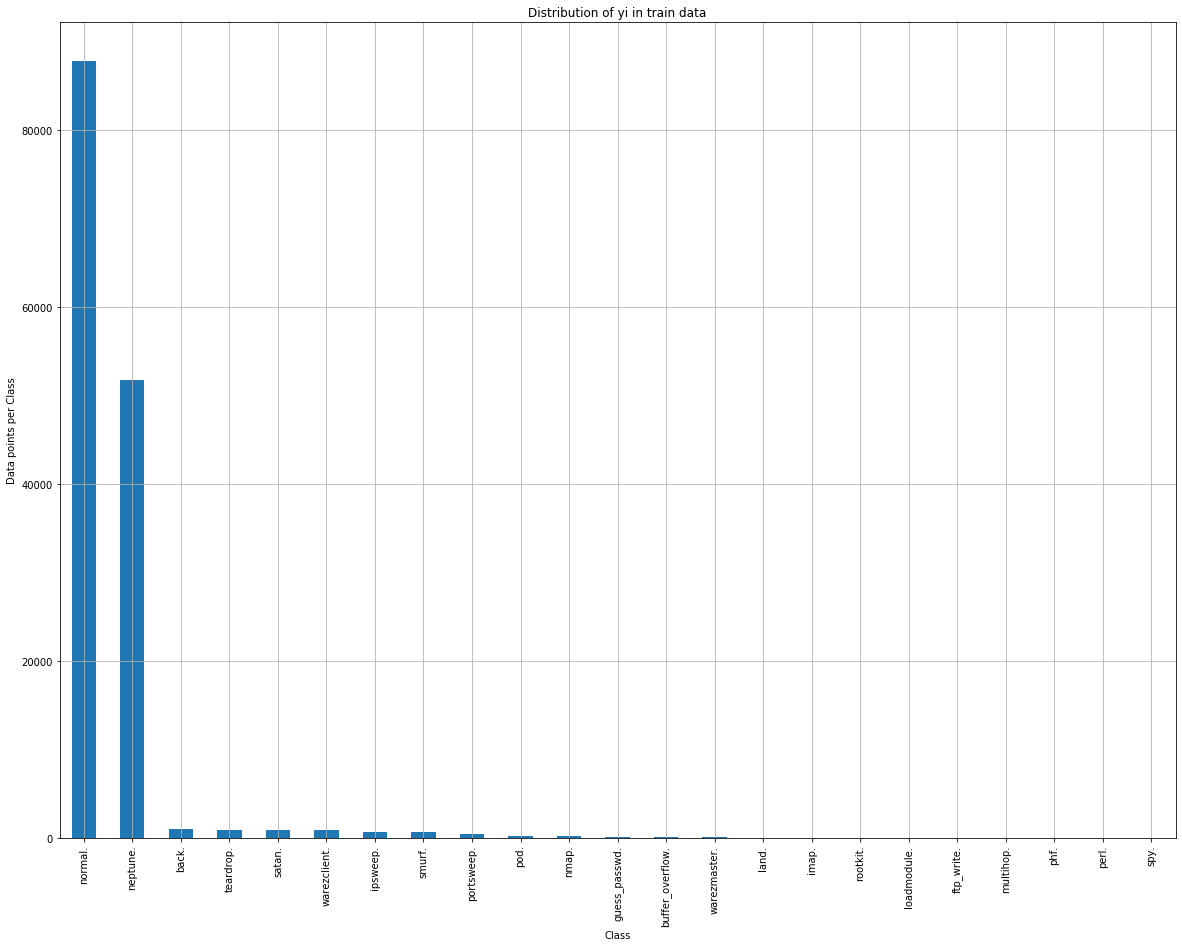

In [8]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

Most of the data points are from "normal" category which is around 60.33 %.

In the categories that belong to bad connections, "neptune." 35.594 % and "back." 0.665 % have the highest no of data points.

Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least no of data points with less than 10 data points per class.

# Feature Extraction

In [9]:
data['num_outbound_cmds'].value_counts()
data.drop('num_outbound_cmds', axis=1, inplace=True)
data['is_host_login'].value_counts()
data.drop('is_host_login', axis=1, inplace=True)

# Transformation of categorical values

In [10]:

data['protocol_type'] = data['protocol_type'].astype('category')
data['service'] = data['service'].astype('category')
data['flag'] = data['flag'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [11]:
X = data.drop('intrusion_type', axis=1)
Y = data['intrusion_type']

In [12]:
data.replace(to_replace = ['ipsweep.', 'portsweep.', 'nmap.', 'satan.'], value = 'probe', inplace = True)
data.replace(to_replace = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'], value = 'r2l', inplace = True)
data.replace(to_replace = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'], value = 'u2r', inplace = True)
data.replace(to_replace = ['back.', 'land.' , 'neptune.', 'pod.', 'smurf.', 'teardrop.'], value = 'dos', inplace = True)

# Standardization

In [13]:

from sklearn.preprocessing import StandardScaler

sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
names_inputed =features[0:39]
data = pd.DataFrame(data=rescaleX, columns=names_inputed)

#  Normalization


In [14]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X = norm.fit_transform(X)


# Applying Machine Learning Algorithm

In [15]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
def confusion_matrix_func(Y_test, y_test_pred):

    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['dos','normal','probe', 'r2l', 'u2r']
    sns.set(font_scale=1.1)
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(cm_df, annot=True, 
            fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    plt.show()
    
    

In [17]:
results_test = dict()
results_test['accuracy'] = 0
results_test['precision'] = 0
results_test['recall'] = 0
results_test['f1_score'] = 0


def reset_result():
    results_test['accuracy'] = 0
    results_test['precision'] = 0
    results_test['recall'] = 0
    results_test['f1_score'] = 0
    print('Prediction on test data:')


def print_result():    
    print('Accuracy score is:')
    print(results_test['accuracy'] / 5)
    print('='*50)
    print('Precision score is:')
    print(results_test['precision'] / 5)
    print('='*50)
    print('Recall score is:')
    print(results_test['recall'] / 5)
    print('='*50)
    print('F1-score is:')
    print(results_test['f1_score'] / 5)
                
    return results_test

In [18]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    model_name.fit(X_train, Y_train)    
    y_test_pred = model_name.predict(X_test)
    
    print('='*50)

    print('Classification Report: ')
    result_classification_report = classification_report(Y_test, y_test_pred)
    print(result_classification_report)

    results_test['accuracy'] += accuracy_score(Y_test, y_test_pred)
    results_test['precision'] += precision_score(Y_test, y_test_pred, average='weighted')
    results_test['recall'] += recall_score(Y_test, y_test_pred, average='weighted')
    results_test['f1_score'] += f1_score(Y_test, y_test_pred, average='weighted')
    
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)

In [19]:
X = np.array(X)
Y = np.array(Y)

In [20]:
def kfold_validation(classifer):
    kf = KFold(n_splits=5)
    start = dt.datetime.now()
    reset_result()
    
    for train_index, test_index in kf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model(classifer, X_train, Y_train, X_test, Y_test)
    print_result()
    print('Completed')
    print('Total time:',dt.datetime.now()-start)

In [21]:
%matplotlib inline

# Model 1: Decision Tree

Prediction on test data:
Classification Report: 
              precision    recall  f1-score   support

         dos       0.84      0.54      0.66       193
     normal.       0.99      1.00      1.00     28760
       probe       0.95      0.69      0.80       108
         r2l       0.09      0.02      0.03        53
         u2r       0.60      0.75      0.67         4

    accuracy                           0.99     29118
   macro avg       0.70      0.60      0.63     29118
weighted avg       0.99      0.99      0.99     29118

Confusion Matrix is:


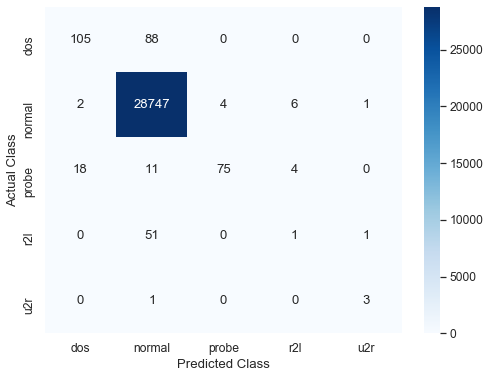

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.97      0.98     13130
     normal.       0.97      1.00      0.98     15605
       probe       0.92      0.80      0.86       333
         r2l       0.42      0.10      0.17        48
         u2r       0.25      1.00      0.40         1

    accuracy                           0.98     29117
   macro avg       0.71      0.77      0.68     29117
weighted avg       0.98      0.98      0.98     29117

Confusion Matrix is:


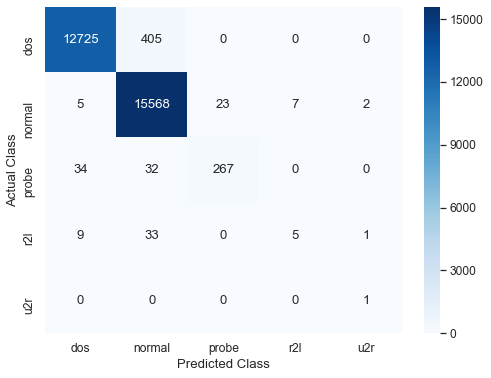

Classification Report: 
              precision    recall  f1-score   support

         dos       0.99      1.00      0.99      4348
     normal.       0.99      1.00      0.99     22872
       probe       0.95      0.95      0.95      1088
         r2l       0.98      0.57      0.72       799
         u2r       1.00      0.30      0.46        10

    accuracy                           0.99     29117
   macro avg       0.98      0.76      0.82     29117
weighted avg       0.99      0.99      0.98     29117

Confusion Matrix is:


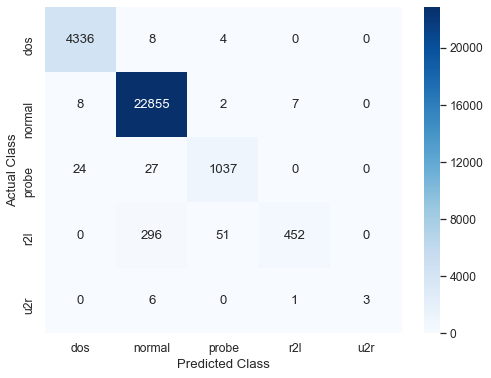

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.99      0.99     22401
     normal.       0.98      1.00      0.99      6156
       probe       0.62      0.94      0.75       442
         r2l       0.83      0.70      0.76        98
         u2r       0.88      0.35      0.50        20

    accuracy                           0.99     29117
   macro avg       0.86      0.80      0.80     29117
weighted avg       0.99      0.99      0.99     29117

Confusion Matrix is:


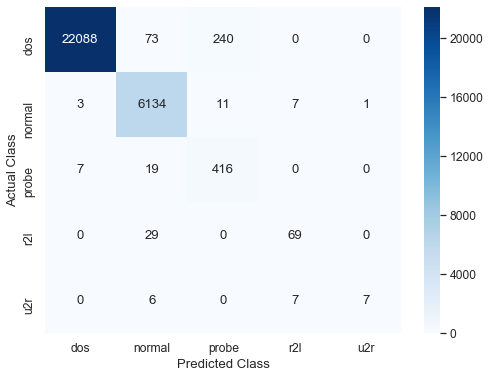

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.32      0.48     14500
     normal.       0.96      1.00      0.98     14439
       probe       0.02      0.99      0.03       160
         r2l       0.06      1.00      0.11         1
         u2r       1.00      0.35      0.52        17

    accuracy                           0.66     29117
   macro avg       0.61      0.73      0.42     29117
weighted avg       0.97      0.66      0.72     29117

Confusion Matrix is:


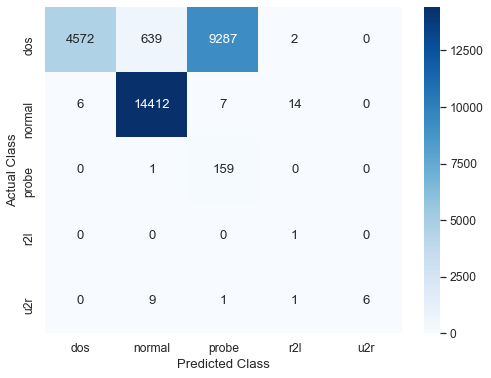

Accuracy score is:
0.9207198984932814
Precision score is:
0.9838388426357595
Recall score is:
0.9207198984932814
F1-score is:
0.9333967338225151
Completed
Total time: 0:00:18.531055


In [50]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini',class_weight='balanced')
kfold_validation(decision_tree)

Prediction on test data:
Classification Report: 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      0.87      0.93       193
     normal.       0.99      1.00      1.00     28760
       probe       0.97      0.27      0.42       108
         r2l       0.00      0.00      0.00        53
         u2r       1.00      1.00      1.00         4

    accuracy                           0.99     29118
   macro avg       0.79      0.63      0.67     29118
weighted avg       0.99      0.99      0.99     29118



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix is:


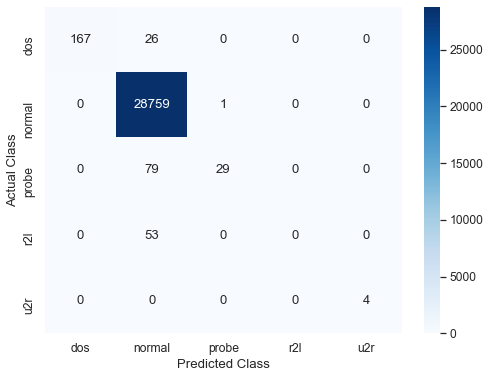

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13130
     normal.       1.00      1.00      1.00     15605
       probe       0.99      0.80      0.88       333
         r2l       0.67      0.04      0.08        48
         u2r       0.00      0.00      0.00         1

    accuracy                           1.00     29117
   macro avg       0.73      0.57      0.59     29117
weighted avg       1.00      1.00      0.99     29117

Confusion Matrix is:


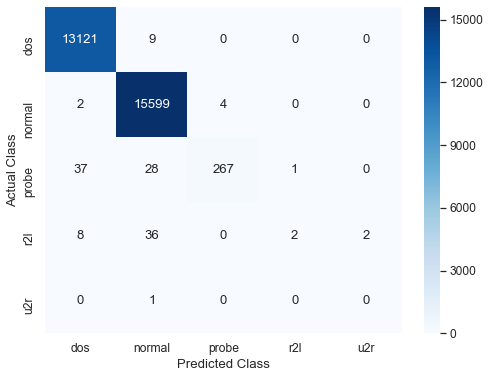

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      4348
     normal.       0.98      1.00      0.99     22872
       probe       0.99      0.91      0.95      1088
         r2l       0.99      0.65      0.79       799
         u2r       1.00      0.30      0.46        10

    accuracy                           0.99     29117
   macro avg       0.99      0.77      0.84     29117
weighted avg       0.99      0.99      0.99     29117

Confusion Matrix is:


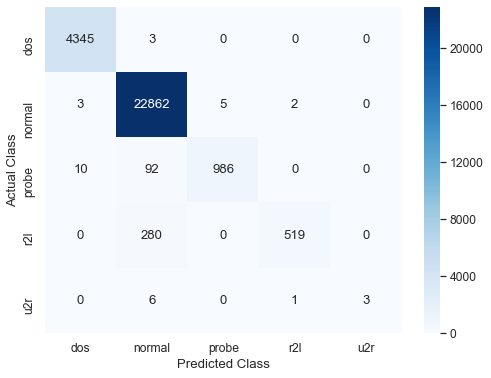

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     22401
     normal.       1.00      1.00      1.00      6156
       probe       0.99      0.98      0.99       442
         r2l       1.00      0.97      0.98        98
         u2r       0.92      0.55      0.69        20

    accuracy                           1.00     29117
   macro avg       0.98      0.90      0.93     29117
weighted avg       1.00      1.00      1.00     29117

Confusion Matrix is:


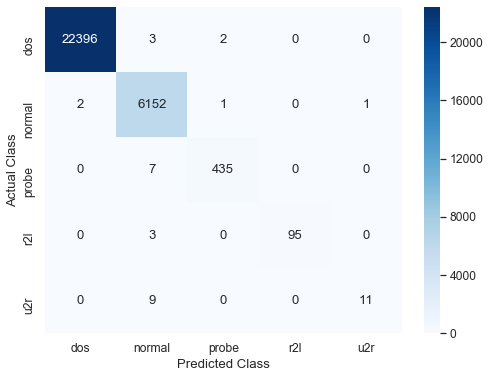

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.32      0.49     14500
     normal.       1.00      1.00      1.00     14439
       probe       0.02      0.99      0.03       160
         r2l       1.00      1.00      1.00         1
         u2r       1.00      0.41      0.58        17

    accuracy                           0.66     29117
   macro avg       0.80      0.75      0.62     29117
weighted avg       0.99      0.66      0.74     29117

Confusion Matrix is:


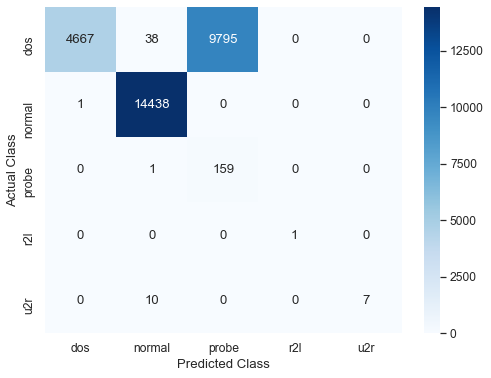

Accuracy score is:
0.9274513546075479
Precision score is:
0.9931848632520162
Recall score is:
0.9274513546075479
F1-score is:
0.9419555571246233
Completed
Total time: 0:02:36.328575


In [51]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100)
kfold_validation(randomForest)


# Model 3: Naive Bayes

Prediction on test data:
Classification Report: 
              precision    recall  f1-score   support

         dos       0.96      0.63      0.76       193
     normal.       0.99      0.24      0.38     28760
       probe       0.18      0.93      0.30       108
         r2l       0.00      0.00      0.00        53
         u2r       0.00      1.00      0.00         4

    accuracy                           0.24     29118
   macro avg       0.43      0.56      0.29     29118
weighted avg       0.98      0.24      0.39     29118

Confusion Matrix is:


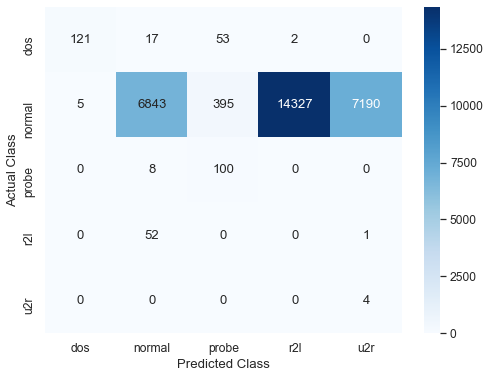

Classification Report: 
              precision    recall  f1-score   support

         dos       0.99      0.94      0.97     13130
     normal.       0.99      0.43      0.60     15605
       probe       0.11      0.79      0.19       333
         r2l       0.00      0.06      0.00        48
         u2r       0.00      1.00      0.00         1

    accuracy                           0.66     29117
   macro avg       0.42      0.64      0.35     29117
weighted avg       0.98      0.66      0.76     29117

Confusion Matrix is:


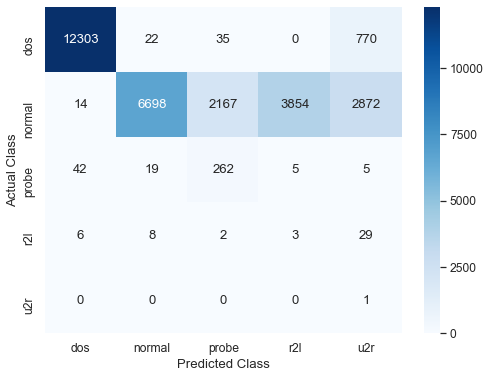

Classification Report: 
              precision    recall  f1-score   support

         dos       0.98      0.94      0.96      4348
     normal.       0.97      0.69      0.81     22872
       probe       0.47      0.87      0.61      1088
         r2l       0.58      0.32      0.42       799
         u2r       0.00      0.90      0.00        10

    accuracy                           0.73     29117
   macro avg       0.60      0.75      0.56     29117
weighted avg       0.94      0.73      0.81     29117

Confusion Matrix is:


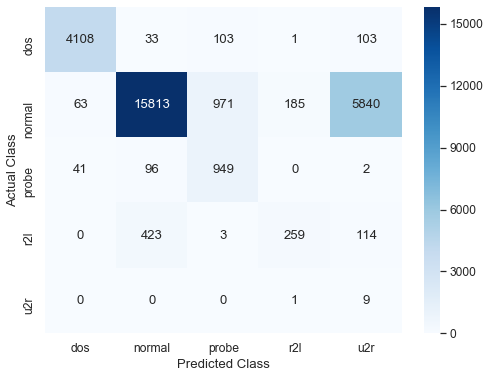

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     22401
     normal.       0.97      0.77      0.85      6156
       probe       0.36      0.92      0.52       442
         r2l       0.18      0.24      0.21        98
         u2r       0.03      0.85      0.05        20

    accuracy                           0.94     29117
   macro avg       0.51      0.75      0.53     29117
weighted avg       0.98      0.94      0.96     29117

Confusion Matrix is:


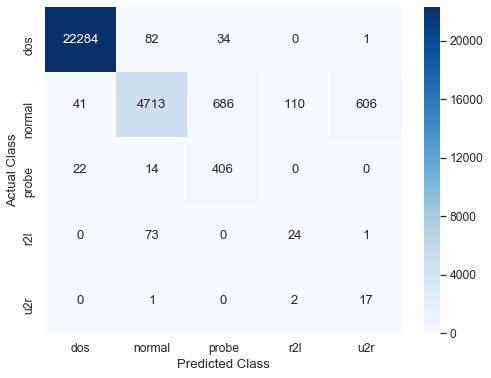

Classification Report: 
              precision    recall  f1-score   support

         dos       0.92      0.31      0.46     14500
     normal.       1.00      0.72      0.83     14439
       probe       0.01      0.94      0.02       160
         r2l       0.00      0.00      0.00         1
         u2r       0.02      0.71      0.03        17

    accuracy                           0.51     29117
   macro avg       0.39      0.53      0.27     29117
weighted avg       0.95      0.51      0.64     29117

Confusion Matrix is:


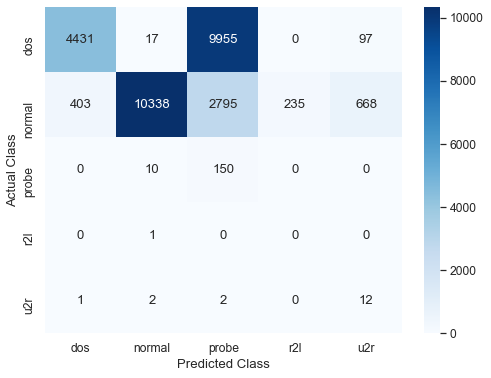

Accuracy score is:
0.6171498249376537
Precision score is:
0.9664085999165005
Recall score is:
0.6171498249376537
F1-score is:
0.7102650962788861
Completed
Total time: 0:00:06.166833


In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
kfold_validation(gaussian_nb)

# Model 4: KNN

Prediction on test data:
Classification Report: 
              precision    recall  f1-score   support

         dos       0.87      0.67      0.76       193
     normal.       1.00      1.00      1.00     28760
       probe       0.70      0.57      0.63       108
         r2l       0.00      0.00      0.00        53
         u2r       0.40      0.50      0.44         4

    accuracy                           0.99     29118
   macro avg       0.59      0.55      0.57     29118
weighted avg       0.99      0.99      0.99     29118

Confusion Matrix is:


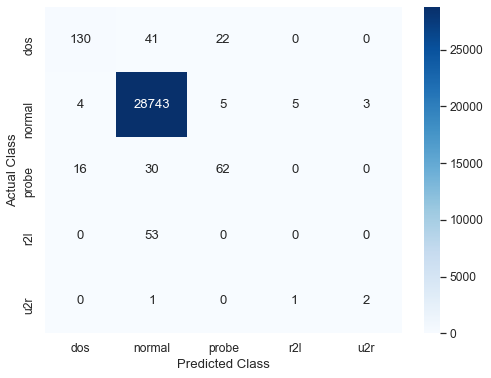

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13130
     normal.       0.99      1.00      0.99     15605
       probe       0.90      0.74      0.81       333
         r2l       0.07      0.04      0.05        48
         u2r       0.00      0.00      0.00         1

    accuracy                           0.99     29117
   macro avg       0.59      0.56      0.57     29117
weighted avg       0.99      0.99      0.99     29117

Confusion Matrix is:


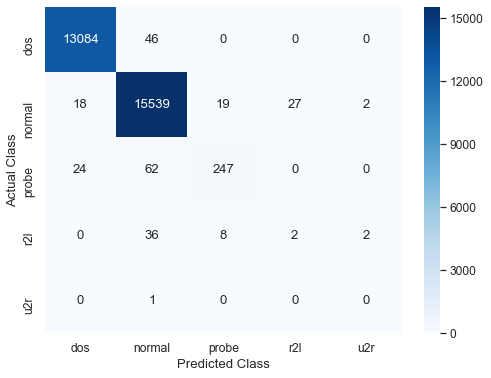

Classification Report: 
              precision    recall  f1-score   support

         dos       0.97      1.00      0.98      4348
     normal.       0.98      1.00      0.99     22872
       probe       0.98      0.78      0.87      1088
         r2l       0.99      0.65      0.78       799
         u2r       0.60      0.30      0.40        10

    accuracy                           0.98     29117
   macro avg       0.90      0.75      0.81     29117
weighted avg       0.98      0.98      0.98     29117

Confusion Matrix is:


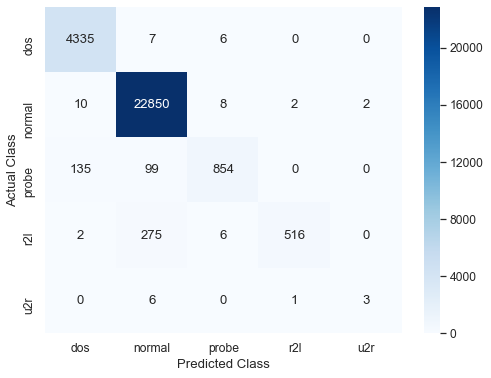

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     22401
     normal.       0.98      0.99      0.99      6156
       probe       0.86      0.91      0.89       442
         r2l       0.90      0.98      0.94        98
         u2r       1.00      0.20      0.33        20

    accuracy                           0.99     29117
   macro avg       0.95      0.82      0.83     29117
weighted avg       0.99      0.99      0.99     29117

Confusion Matrix is:


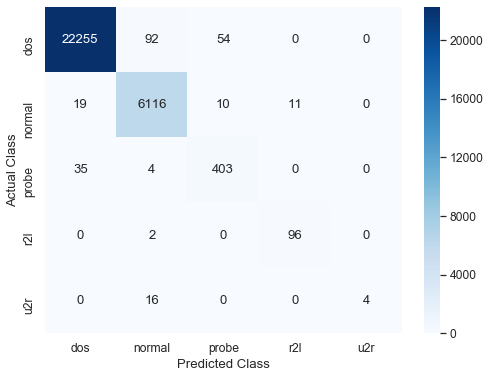

Classification Report: 
              precision    recall  f1-score   support

         dos       1.00      0.89      0.94     14500
     normal.       0.99      1.00      0.99     14439
       probe       0.10      0.98      0.17       160
         r2l       0.08      1.00      0.14         1
         u2r       0.86      0.35      0.50        17

    accuracy                           0.94     29117
   macro avg       0.60      0.84      0.55     29117
weighted avg       0.99      0.94      0.96     29117

Confusion Matrix is:


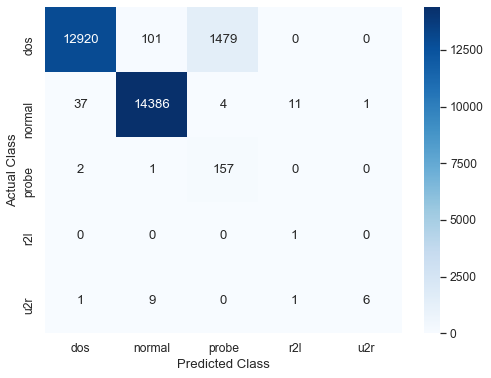

Accuracy score is:
0.9802521291073001
Precision score is:
0.9890022320956418
Recall score is:
0.9802521291073001
F1-score is:
0.9835317710753337
Completed
Total time: 0:00:56.435346


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
kfold_validation(knn)